In [41]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')
texts = newsgroups.data
y_labels = newsgroups.target

In [43]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_tfidf = vectorizer.fit_transform(texts)
print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (18846, 10000)


In [44]:
#Dimensionality Reduction using SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("SVD-reduced shape:", X_svd.shape)

SVD-reduced shape: (18846, 2)


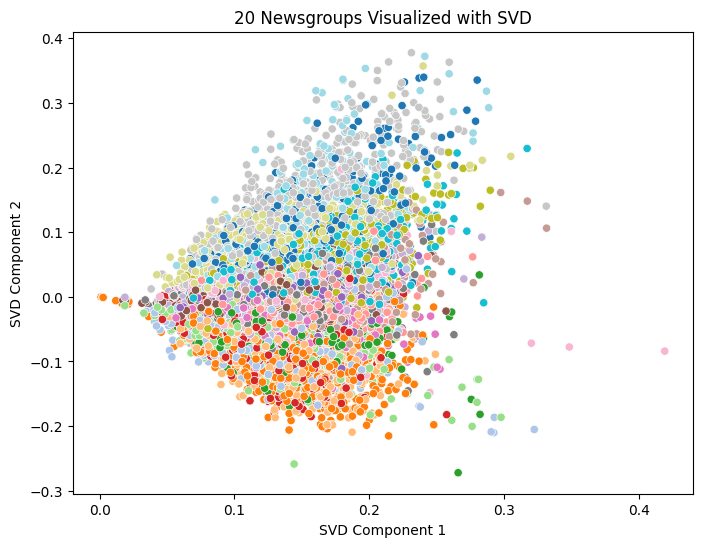

In [45]:
#Visualize the top 2 components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y_labels, palette='tab20', legend=False)
plt.title("20 Newsgroups Visualized with SVD")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.show()

In [46]:
#Optional: Clustering with KMeans (20 clusters)
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_labels = kmeans.fit_predict(X_svd)

In [47]:
#Evaluate with silhouette score
score = silhouette_score(X_svd, kmeans_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.31390316012888225


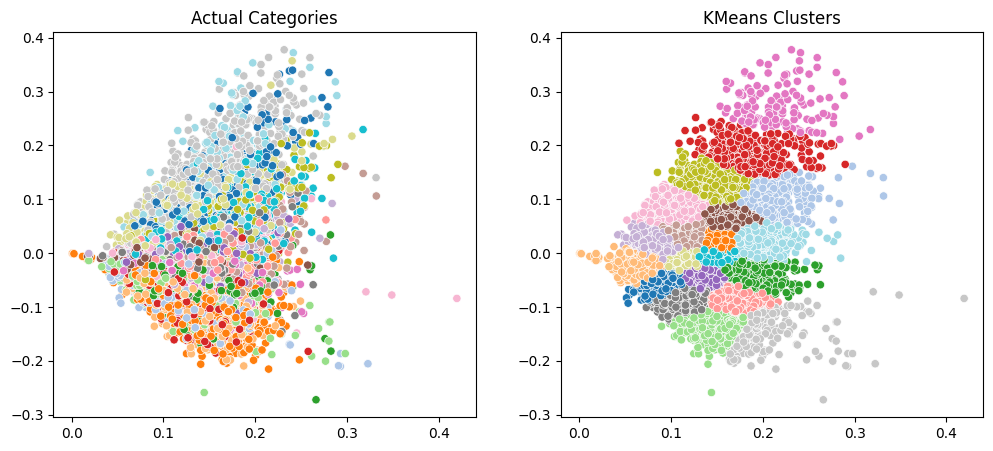

In [48]:
#Compare predicted vs actual clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y_labels, palette='tab20', legend=False)
plt.title("Actual Categories")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=kmeans_labels, palette='tab20', legend=False)
plt.title("KMeans Clusters")
plt.show()

Explanation:

Dimensionality reduction is used because TF-IDF matrices are high-dimensional and sparse, which can lead to inefficiencies in computation and visualization.
SVD (or PCA) reduces this high-dimensional space to a smaller number of components that retain the most important variance in the data.
This makes it easier to visualize and interpret the underlying structure of text data.
Clustering on the reduced components helps reveal natural groupings in the data, even without using the original labels.